In [59]:
# ! pip install pycountry

     |████████████████████████████████| 10.1 MB 7.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=d043408bcb08140b13a07c4720d677b6a75b01364822200ef6c26f765706e743
  Stored in directory: /Users/shubh/Library/Caches/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import glob
sns.set(style="darkgrid")
plt.style.use("seaborn-pastel")

In [2]:
#save all tables one by one into separate sav files
# tsv_files = glob.glob("*.tsv")
# for file in tsv_files:
#     print(file)
#     pickle.dump(pd.read_table(file,sep="\t",low_memory=False, na_values=["\\N","nan"]),
#                 open(file[:-4]+".sav","wb"))

title.ratings.tsv
title.principals.tsv
title.akas.tsv
name.basics.tsv
title.basics.tsv
title.episode.tsv
title.crew.tsv


# Title Ratings Table

In [3]:
df_ratings = pickle.load(open("title.ratings.sav","rb"))
df_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1923
1,tt0000002,5.8,260
2,tt0000003,6.5,1732
3,tt0000004,5.6,174
4,tt0000005,6.2,2544


In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243998 entries, 0 to 1243997
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1243998 non-null  object 
 1   averageRating  1243998 non-null  float64
 2   numVotes       1243998 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.5+ MB


In [5]:
df_ratings.describe()

,averageRating,numVotes
count,1.243998e+06,1.243998e+06
mean,6.949027e+00,1.042300e+03
std,1.390683e+00,1.727740e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.200000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.010000e+02
max,1.000000e+01,2.656994e+06


## Average rating distribution shows a classic negative skewed distribution where the median is larger than mean. Vote count distribution is heavily clustered around small values (0–1000 votes). 

/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

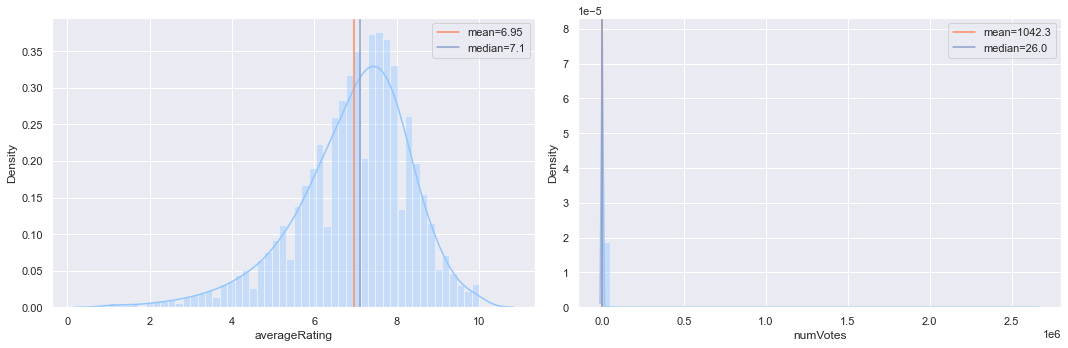

In [12]:
ratings = dict(mean=df_ratings.averageRating.mean(),
              median=df_ratings.averageRating.median())
votes = dict(mean=df_ratings.numVotes.mean(),
              median=df_ratings.numVotes.median())
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.distplot(df_ratings.averageRating,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c=sns.color_palette("Set2")[1],label=f"mean={round(ratings['mean'], 2)}")
ax1.axvline(x=ratings["median"],c=sns.color_palette("Set2")[2],label=f"median={round(ratings['median'], 2)}")
plt.legend()

plt.subplot(1,2,2)
ax2 = sns.distplot(df_ratings.numVotes,kde_kws=dict(bw=0.2))
ax2.axvline(x=votes["mean"],c=sns.color_palette("Set2")[1],label=f"mean={round(votes['mean'], 2)}")
ax2.axvline(x=votes["median"],c=sns.color_palette("Set2")[2],label=f"median={round(votes['median'], 2)}")
plt.legend()
plt.tight_layout()
plt.show()

## The films having more than 1095 votes are represented with a single bar in the plot which counts around 50K (these are the significant/popular films we are mostly interested in)

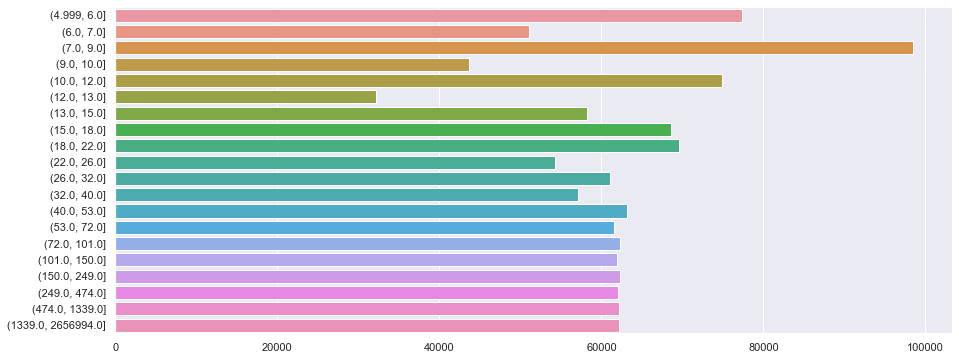

In [13]:
buckets = 20
plt.figure(figsize=(15,6))
bins = pd.qcut(df_ratings.numVotes,buckets,duplicates="drop").value_counts()
sns.barplot(x=bins.values,y=bins.index,orient="h")
plt.show()

## Also, we can consider plotting the distribution on a logarithmic scale which reveals more. Since it is a count variable, it looks more like a Poisson distribution

/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


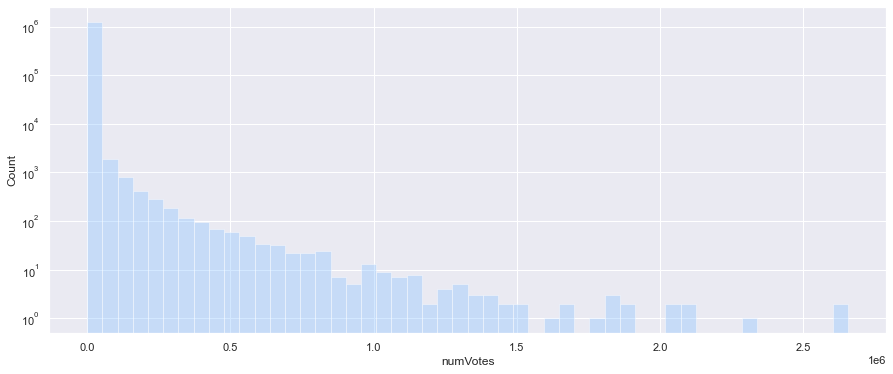

In [14]:
plt.figure(figsize=(15,6))
ax=sns.distplot(df_ratings.numVotes,kde=False)
ax.set_ylabel("Count")
ax.set_yscale("log")

# Title Basics Table

In [15]:
df_title_basics = pickle.load(open("title.basics.sav","rb"))
df_title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short"


In [16]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345131 entries, 0 to 9345130
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 641.7+ MB


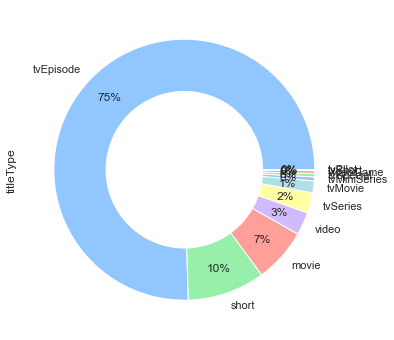

In [17]:
df_title_basics.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

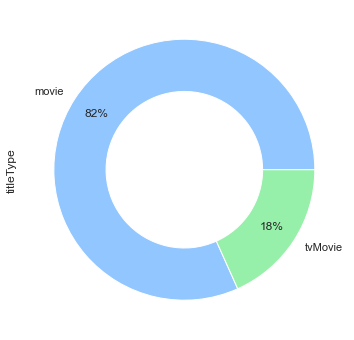

In [18]:
df_title_basics = df_title_basics[df_title_basics.isAdult == 0]
df_title_basics.drop(["isAdult","endYear"],axis=1,inplace=True)
df_title_basics = df_title_basics[(df_title_basics.titleType == "movie") | (df_title_basics.titleType == "tvMovie")]
df_title_basics.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

## The distribution of Genres

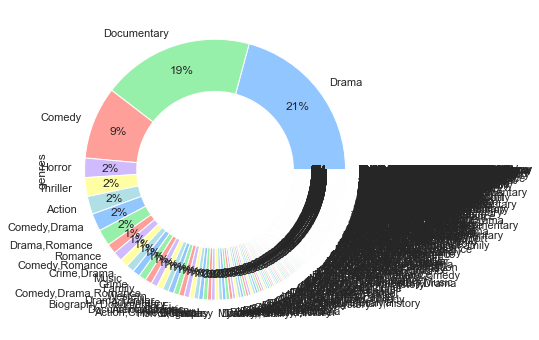

In [19]:
df_title_basics.genres.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

## Unique genres:

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
temp = df_title_basics.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
np.array(unique_genres)

array(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir',
       'game-show', 'history', 'horror', 'music', 'musical', 'mystery',
       'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport',
       'talk-show', 'thriller', 'war', 'western'], dtype='<U11')

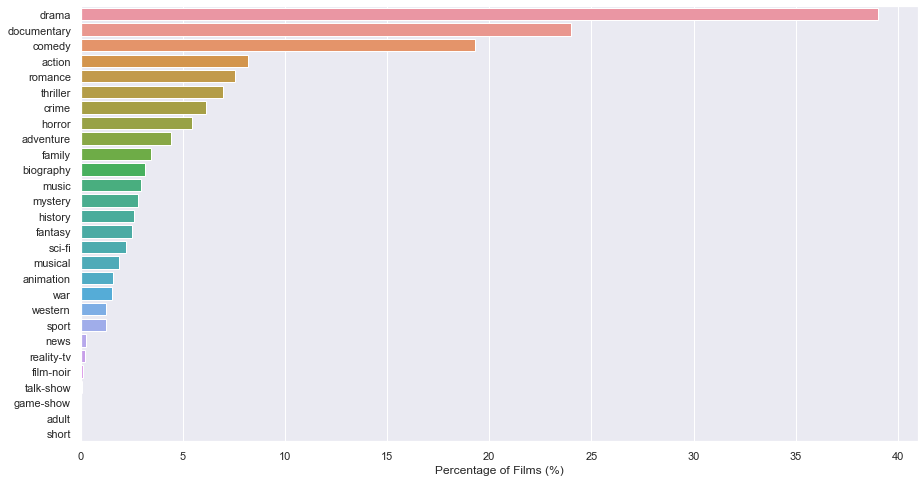

In [21]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

## The trend for the number of voters per year and voter counts per year/per film

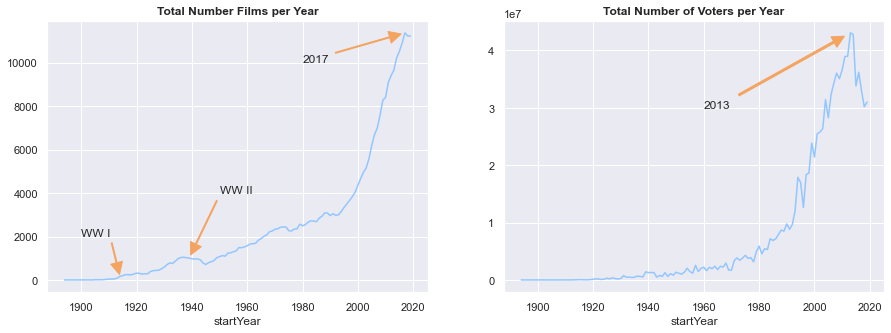

In [22]:
merged_temp = pd.merge(df_ratings,df_title_basics,on="tconst",how="left")
merged_temp = merged_temp[(merged_temp.startYear.notnull())&(merged_temp.startYear<2020)]
counts_yearly = merged_temp.groupby("startYear").agg({"averageRating":[np.median],
                                                     "numVotes":[np.sum,np.size,lambda x: np.sum(x)/np.size(x)]})
max_count_year = counts_yearly[("numVotes","sum")].idxmax().astype(int)
max_year = counts_yearly[("numVotes","size")].idxmax().astype(int)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax =counts_yearly[("numVotes","size")].plot()
ax.annotate(max_year,xy=(max_year,counts_yearly[("numVotes","size")].max()),
            xytext=(1980,10000), arrowprops=dict(color="sandybrown",shrink=0.05,width=1))
ax.annotate("WW I",xy=(1914,counts_yearly[("numVotes","size")].loc[1914]), xytext=(1900,2000), 
            arrowprops=dict(color="sandybrown",shrink=0.05,width=1))
ax.annotate("WW II",xy=(1939,counts_yearly[("numVotes","size")].loc[1939]), xytext=(1950,4000), 
            arrowprops=dict(color="sandybrown",shrink=0.05,width=1))
plt.title("Total Number Films per Year",fontweight="bold")
plt.subplot(1,2,2)
ax =counts_yearly[("numVotes","sum")].plot()
ax.annotate(max_count_year,xy=(max_count_year,counts_yearly[("numVotes","sum")].max()),
            xytext=(1960,3e7),arrowprops=dict(shrink=0.05,color="sandybrown",width=2))
plt.title("Total Number of Voters per Year",fontweight="bold")
plt.show()

### The graph below has two subplots again. The former gives the average rating of films per year, whereas the latter displays the average voters per film again on a yearly basis. Since the 1920s, average film ratings tend to fluctuate but not showing a monotonic increase/decrease trend.

### The latter graph reaches its peak in the 90s and early 2000s and has been dropping dramatically since then. Recall that the total number of voters per year was peaked in 2013, not 90s. This means that 90s films got the attention of users the most. This can be related to the dominance of the age group of the IMDb voters. Since we don’t have that information, we can guess that the dominant age group must be in the range of 30 to 50. 90s films are their childhood or teenage times films which you get impressed the most of a film huh? There could be other factors like the 90s films are better etc.

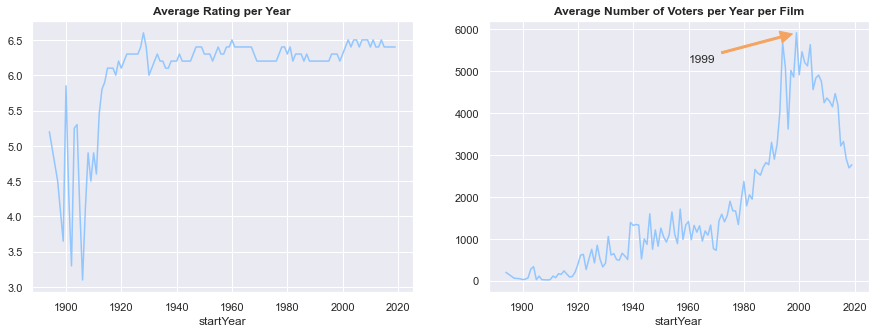

In [23]:
max_count_year_per_film = counts_yearly[("numVotes","<lambda_0>")].idxmax().astype(int)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax =counts_yearly[("averageRating","median")].plot()
plt.title("Average Rating per Year",fontweight="bold")
plt.subplot(1,2,2)
ax = counts_yearly[("numVotes","<lambda_0>")].plot()
ax.annotate(max_count_year_per_film,xy=(max_count_year_per_film,counts_yearly[("numVotes","<lambda_0>")].max()),
            xytext=(1960,5200),arrowprops=dict(shrink=0.05,color="sandybrown",width=2))
plt.title("Average Number of Voters per Year per Film",fontweight="bold")
plt.show()

### Visualise the distribution of film runtimes in minutes. The single bar below is an indication that there are a few outlier films which have a runtime over 50000 minutes

/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


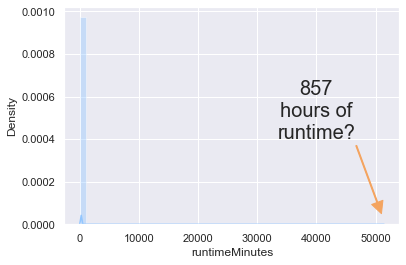

In [24]:
sns.distplot(df_title_basics.runtimeMinutes.dropna().astype(int),bins=50)
plt.gca().annotate("857\nhours of\nruntime?",xy=(51000,0.00005),xytext=(40000,0.0004),
                   fontsize=20, ha="center",
                   arrowprops=dict(color="sandybrown",width=1))
plt.show()

In [25]:
import warnings
warnings.filterwarnings("ignore")
use = df_title_basics[df_title_basics.runtimeMinutes.notnull()]
use["runtimeMinutes"] = use.runtimeMinutes.astype(int)
use[use.runtimeMinutes>50000]

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
8588459,tt8273150,movie,Logistics,Logistics,2012.0,51420,Documentary


In [26]:
use.sort_values(by="runtimeMinutes",ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
8588459,tt8273150,movie,Logistics,Logistics,2012.0,51420,Documentary
6607241,tt3854496,movie,Ambiancé,Ambiancé,2020.0,43200,Documentary
2232967,tt12277054,movie,Carnets Filmés (Liste Complète),Carnets Filmés (Liste Complète),2019.0,28643,Documentary
6097651,tt2659636,movie,Modern Times Forever,Modern Times Forever,2011.0,14400,Documentary
1438216,tt10844900,movie,Qw,Qw,2019.0,10062,Drama


### In order to see a clear distribution of “films”, we need to take these outliers off from the data and plot the rest. We will do that by focusing only on the movies with 300 minutes runtime or less

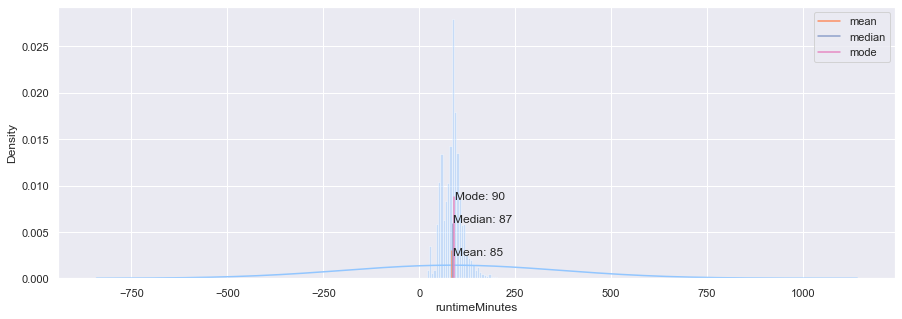

In [27]:
rt = use.runtimeMinutes[use.runtimeMinutes<300]
mean_rt,median_rt,mode_rt = rt.mean(),rt.median(),rt.mode()[0]
plt.figure(figsize=(15,5))
sns.distplot(rt,kde_kws=dict(bw=10))
plt.gca().axvline(mean_rt,label="mean",color=sns.color_palette("Set2")[1],ymax=0.1)
plt.gca().axvline(median_rt,label="median",color=sns.color_palette("Set2")[2],ymax=0.2)
plt.gca().axvline(mode_rt,label="mode",color=sns.color_palette("Set2")[3],ymax=0.3)
plt.text(mean_rt+2,0.0025,f"Mean: {int(mean_rt)}")
plt.text(median_rt+2,0.006,f"Median: {int(median_rt)}")
plt.text(mode_rt+2,0.0085,f"Mode: {int(mode_rt)}")
plt.legend()
plt.show()

In [28]:
merged = pd.merge(df_ratings,df_title_basics,on="tconst",how="right").sort_values(by="numVotes",ascending=False)
merged[["numVotes","primaryTitle","startYear"]].iloc[:20,:]

,numVotes,primaryTitle,startYear
83391,2656994.0,The Shawshank Redemption,1994.0
237899,2629679.0,The Dark Knight,2008.0
369336,2330314.0,Inception,2010.0
98261,2102086.0,Fight Club,1999.0
82343,2058497.0,Forrest Gump,1994.0
83181,2033655.0,Pulp Fiction,1994.0
96340,1899121.0,The Matrix,1999.0
90004,1860502.0,The Lord of the Rings: The Fellowship of the Ring,2001.0
50817,1841519.0,The Godfather,1972.0
110598,1831937.0,The Lord of the Rings: The Return of the King,2003.0


In [29]:
merged[merged.numVotes>25000].sort_values(by="averageRating",ascending=False).head(20)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
83391,tt0111161,9.3,2656994.0,movie,The Shawshank Redemption,The Shawshank Redemption,1994.0,142,Drama
50817,tt0068646,9.2,1841519.0,movie,The Godfather,The Godfather,1972.0,175,"Crime,Drama"
152959,tt0252487,9.2,40813.0,movie,The Chaos Class,Hababam Sinifi,1975.0,87,"Comedy,Drama"
533955,tt2592910,9.1,46359.0,movie,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013.0,139,"Comedy,Documentary"
412028,tt15327088,9.1,59858.0,movie,Kantara,Kantara,2022.0,148,"Action,Adventure,Drama"
36003,tt0050083,9.0,784476.0,movie,12 Angry Men,12 Angry Men,1957.0,96,"Crime,Drama"
53125,tt0071562,9.0,1261658.0,movie,The Godfather Part II,The Godfather Part II,1974.0,202,"Crime,Drama"
110598,tt0167260,9.0,1831937.0,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003.0,201,"Action,Adventure,Drama"
237899,tt0468569,9.0,2629679.0,movie,The Dark Knight,The Dark Knight,2008.0,152,"Action,Crime,Drama"
81176,tt0108052,9.0,1345913.0,movie,Schindler's List,Schindler's List,1993.0,195,"Biography,Drama,History"


In [30]:
merged[merged.numVotes>25000].sort_values(by="averageRating",ascending=True).head(20)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
653588,tt5988370,1.0,73392.0,movie,Reis,Reis,2017.0,108,"Biography,Drama"
690503,tt7221896,1.0,38965.0,movie,Cumali Ceber,Cumali Ceber: Allah Seni Alsin,2017.0,100,Comedy
708307,tt7886848,1.1,95904.0,movie,Sadak 2,Sadak 2,2020.0,133,"Action,Drama"
655167,tt6038600,1.2,39712.0,movie,Smolensk,Smolensk,2016.0,120,"Drama,Thriller"
396645,tt14723224,1.5,38071.0,movie,The Cost of Deception,Elk*rtuk,2021.0,125,"Action,Crime,Drama"
163033,tt0270846,1.5,31125.0,movie,Superbabies: Baby Geniuses 2,Superbabies: Baby Geniuses 2,2004.0,88,"Comedy,Family,Sci-Fi"
44593,tt0060666,1.6,36478.0,movie,Manos: The Hands of Fate,Manos: The Hands of Fate,1966.0,70,Horror
442351,tt1702443,1.6,76276.0,movie,Justin Bieber: Never Say Never,Justin Bieber: Never Say Never,2011.0,105,"Documentary,Music"
292559,tt10888594,1.9,177874.0,movie,Radhe,Radhe,2021.0,135,"Action,Crime,Thriller"
696213,tt7431594,1.9,46824.0,movie,Race 3,Race 3,2018.0,160,"Action,Crime,Thriller"


### Let’s visualise average ratings (median) of film genres. We will use the same counter which we used above:

Highest rating average is taken by documentaries and news categories (both political)

horror and sci-fi are in the bottom of the list (could be due to too many nonsense examples in both)

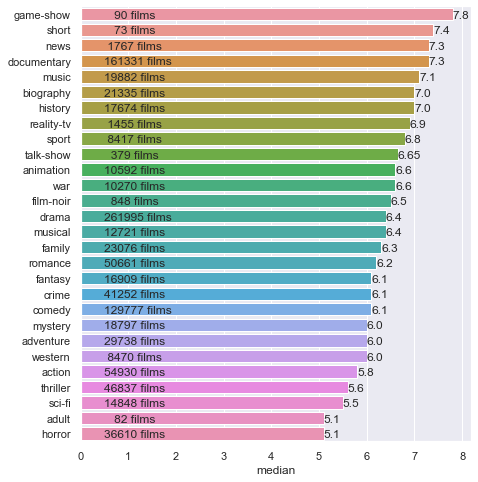

In [31]:
merged_temp = merged[merged.genres.notnull()]
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(merged_temp.genres)
bag_of_genres = pd.DataFrame(vec.transform(merged_temp.genres).todense(),
                             columns=vec.get_feature_names(),index=merged_temp.index)
merged_temp = pd.concat([merged_temp,bag_of_genres],axis=1)
rating_counts_means = pd.DataFrame([[merged_temp.averageRating[merged_temp[i]==1].median(),merged_temp[i].sum()] 
 for i in vec.get_feature_names()],columns=["median","count"],index=vec.get_feature_names()).sort_values("median",ascending=False)
plt.figure(figsize=(7,8))
sns.barplot(y=rating_counts_means.index,x=rating_counts_means["median"],orient="h")
for i,counts in enumerate(rating_counts_means["count"]):
    plt.text(0.5,i+0.25,f"{counts:>5} films")
    plt.text(rating_counts_means["median"][i],i+0.25,rating_counts_means["median"][i])
plt.show()

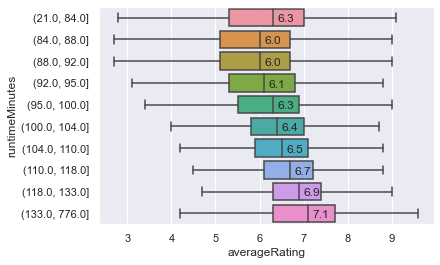

In [32]:
use = merged_temp[merged_temp.numVotes>1000]
use["runtimeMinutes"] = pd.to_numeric(use.runtimeMinutes)
[groups,edges] = pd.qcut(use.runtimeMinutes,10,precision=0,retbins=True)
ratings_avg = use.groupby(groups).agg({"averageRating":np.median})
sns.boxplot(y=groups,x="averageRating",data=use,orient="h",showfliers=False)
for i,rate in enumerate(ratings_avg["averageRating"]):
    plt.text(rate+0.1,i+0.2,rate)
plt.show()

# Name Basics Table

In [33]:
df_name_basics = pickle.load(open("name.basics.sav","rb"))
df_name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0072308,tt0050419"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0037382,tt0071877"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,music_department","tt0049189,tt0056404,tt0057345,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0060827"


In [34]:
df_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12049817 entries, 0 to 12049816
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   nconst             object 
 1   primaryName        object 
 2   birthYear          float64
 3   deathYear          float64
 4   primaryProfession  object 
 5   knownForTitles     object 
dtypes: float64(2), object(4)
memory usage: 551.6+ MB


### The birth year distribution of the persons in the dataset is displayed below. The dataset contains even ancient writers from year 4 A.D.

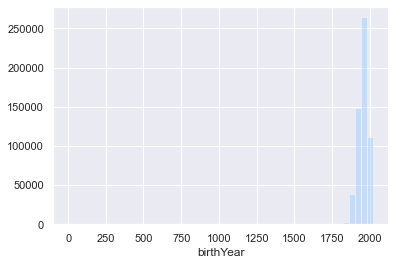

In [35]:
sns.distplot(df_name_basics.birthYear.dropna(),kde=False)
plt.show()

In [36]:
df_name_basics.sort_values("birthYear").head(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
739069,nm0784172,Lucio Anneo Seneca,4.0,65.0,writer,"tt0972562,tt0218822,tt0237666,tt0049203"
7620144,nm4511421,Megan Liz Smith,12.0,NaN,"miscellaneous,actress","tt3416744,tt10183848,tt14300912,tt1966378"
5064774,nm1620433,Karen Abercrombie,13.0,NaN,"actress,writer,producer","tt3832914,tt8180386,tt21107976,tt7383268"
11072578,nm8810146,Paul Walsh,21.0,NaN,actor,"tt0083839,tt0098878,tt0314567,tt0093223"
407353,nm0430769,Flavius Josephus,37.0,95.0,"writer,miscellaneous","tt0049833,tt0273236,tt0009573,tt0237666"
3838448,nm1306202,Plutarch,46.0,122.0,writer,"tt0272979,tt0056937,tt0472473,tt0237666"
486947,nm0515385,Titus Livius,59.0,17.0,writer,tt0003740
3843369,nm1306711,Suetonius,69.0,140.0,writer,"tt0056937,tt0092322,tt0237666,tt3395994"
3817727,nm1304029,Appian,95.0,165.0,writer,tt0056937
3703563,nm1291933,Cassius Dio,163.0,235.0,writer,"tt0092322,tt0237666,tt0397049"


### Distribution of lifespans of persons in the dataset:

Shows a negative skew where mode>median>mean which is expected for distributions showing age at death

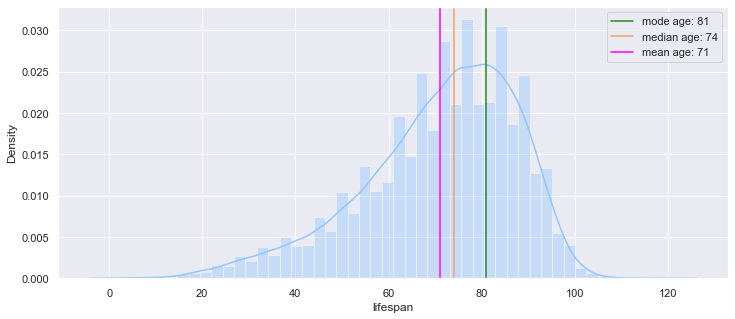

In [37]:
use = df_name_basics[["birthYear","deathYear","primaryName"]].dropna()
use["lifespan"] = use.deathYear - use.birthYear
use["lifespan"][(use.lifespan>200)|(use.lifespan<0)]=use.lifespan.median()
plt.figure(figsize=(12,5))
ax = sns.distplot(use.lifespan)
ax.axvline(use.lifespan.mode()[0],label=f"mode age: {int(use.lifespan.mode()[0])}",color="forestgreen")
ax.axvline(use.lifespan.median(),label=f"median age: {int(use.lifespan.median())}",color="sandybrown")
ax.axvline(use.lifespan.mean(),label=f"mean age: {int(use.lifespan.mean())}",color="fuchsia")
plt.legend()
plt.show()

### |Top 10 persons who have the longest lifespan in the dataset

In [38]:
use.sort_values("lifespan",ascending=False).head(10)

,birthYear,deathYear,primaryName,lifespan
124330,1875.0,1997.0,Jeanne Louise Calment,122.0
230529,1849.0,1970.0,Tatzumbia Dupea,121.0
1874465,1449.0,1568.0,Sankardev,119.0
7446516,1772.0,1890.0,Fakir Lalon Shah,118.0
231352,1879.0,1997.0,Durgabai,118.0
6197364,1898.0,2015.0,Misao Ogawa,117.0
261549,1896.0,2012.0,Gustave Field,116.0
4248879,1877.0,1993.0,Charlotte Hughes,116.0
5338806,1893.0,2009.0,Maria De Jesus,116.0
6297387,1893.0,2008.0,Edna Parker,115.0


# Title Crew Table

In [39]:
df_title_crew = pickle.load(open("title.crew.sav","rb"))
df_title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,NaN
1,tt0000002,nm0721526,NaN
2,tt0000003,nm0721526,NaN
3,tt0000004,nm0721526,NaN
4,tt0000005,nm0005690,NaN


In [40]:
df_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345131 entries, 0 to 9345130
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 213.9+ MB


In [41]:
merged = pd.merge(pd.merge(df_title_basics,df_title_crew,on="tconst",how="left"),df_ratings,on="tconst",how="left")
merged.head(10)

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894.0,45,Romance,nm0085156,nm0085156,5.2,200.0
1,tt0000502,movie,Bohemios,Bohemios,1905.0,100,NaN,nm0063413,"nm0063413,nm0657268,nm0675388",4.2,14.0
2,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,70,"Action,Adventure,Biography",nm0846879,nm0846879,6.0,794.0
3,tt0000591,movie,The Prodigal Son,L'enfant prodigue,1907.0,90,Drama,nm0141150,nm0141150,5.1,20.0
4,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,1907.0,NaN,Drama,nm0533958,"nm0092809,nm0533958",4.3,23.0
5,tt0000630,movie,Hamlet,Amleto,1908.0,NaN,Drama,nm0143333,nm0000636,2.9,25.0
6,tt0000675,movie,Don Quijote,Don Quijote,1908.0,NaN,Drama,nm0194088,nm0148859,4.2,19.0
7,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908.0,120,"Adventure,Fantasy","nm0091767,nm0877783","nm0000875,nm0877783",5.2,66.0
8,tt0000814,movie,La bocana de Mar Chica,La bocana de Mar Chica,1909.0,NaN,NaN,nm0185426,NaN,NaN,NaN
9,tt0000838,movie,A Cultura do Cacau,A Cultura do Cacau,1909.0,NaN,NaN,nm0017074,NaN,NaN,NaN


In [42]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754609 entries, 0 to 754608
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          754609 non-null  object 
 1   titleType       754609 non-null  object 
 2   primaryTitle    754609 non-null  object 
 3   originalTitle   754609 non-null  object 
 4   startYear       666710 non-null  float64
 5   runtimeMinutes  482711 non-null  object 
 6   genres          671593 non-null  object 
 7   directors       671602 non-null  object 
 8   writers         571180 non-null  object 
 9   averageRating   326786 non-null  float64
 10  numVotes        326786 non-null  float64
dtypes: float64(3), object(8)
memory usage: 69.1+ MB


The pie chart below says that it is not as common to have multiple directors (8%) for a film as compared to multiple writers (44%)
The vast majority of films (92%) have a single director, almost 1/3 of films have a writer duo

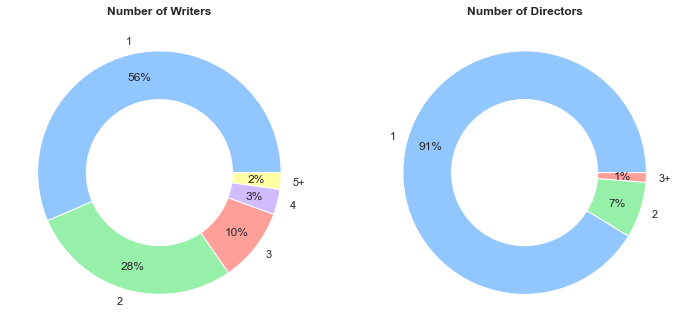

In [43]:
writer_counts = merged.writers.dropna().apply(lambda x: len(x.split(",")))
writer_counts[writer_counts>4] = "5+"
director_counts = merged.directors.dropna().apply(lambda x: len(x.split(",")))
director_counts[director_counts>2] = "3+"
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
writer_counts.value_counts().plot.pie(autopct="%.0f%%",pctdistance=0.8,
                                     wedgeprops=dict(width=0.4))
plt.title("Number of Writers",fontweight="bold")
plt.ylabel(None)
plt.subplot(1,2,2)
director_counts.value_counts().plot.pie(autopct="%.0f%%",pctdistance=0.8,
                                     wedgeprops=dict(width=0.4))
plt.title("Number of Directors",fontweight="bold")
plt.ylabel(None)
plt.show()

In [44]:
writer_counts = merged.writers.dropna().apply(lambda x: len(x.split(",")))
temp = merged[["startYear","primaryTitle","writers"]].loc[writer_counts.nlargest(5).index]
temp["Writer Count"] = writer_counts.nlargest(5)
temp

,startYear,primaryTitle,writers,Writer Count
372819,2021.0,A Fandemic: 50 Fans Celebrate 50 Years of Cinema,"nm0026153,nm0064181,nm0115310,nm0158006,nm0158...",71
460249,2022.0,The Impact,"nm13554276,nm13554262,nm13554263,nm13554290,nm...",69
582640,2022.0,Ted Bundy Had a Son,"nm8657020,nm5755088,nm8657022,nm8657023,nm8468...",62
352560,1987.0,DTV Monster Hits,"nm0767572,nm0813583,nm0908243,nm0003061,nm0006...",58
512164,2014.0,50 Kisses,"nm4270156,nm4380489,nm5443971,nm5443955,nm2478...",52


In [45]:
director_counts = merged.directors.dropna().apply(lambda x: len(x.split(",")))
temp = merged[["startYear","primaryTitle","directors"]].loc[director_counts.nlargest(5).index]
temp["Director Count"] = director_counts.nlargest(5)
del merged, merged_temp
temp

,startYear,primaryTitle,directors,Director Count
582640,2022.0,Ted Bundy Had a Son,"nm5755088,nm8657022,nm8468009,nm3324251,nm7486...",87
587968,2016.0,World of Death,"nm9160937,nm7403267,nm2607125,nm5276508,nm4923...",84
549306,2013.0,Venice 70: Future Reloaded,"nm0170043,nm0953130,nm0948523,nm0014694,nm0000...",74
345992,2009.0,24 Hours Berlin,"nm0374657,nm0013121,nm0046251,nm0061088,nm0067...",69
434884,2007.0,Mission: Studying at the University in Mytilen...,"nm3889225,nm3890037,nm3888786,nm3889957,nm3912...",64


In [46]:
director_temp = df_title_crew.drop("writers",axis=1)
director_temp.columns = ["tconst","nconst"]
director_temp.nconst = director_temp.nconst.dropna().apply(lambda x: x.split(",")[0])
directors = pd.merge(pd.merge(pd.merge(df_title_basics,df_ratings,on="tconst"),
                          director_temp,on="tconst"),
                 df_name_basics[["nconst","primaryName"]],on="nconst")
del director_temp
directors.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,primaryName
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894.0,45,Romance,5.2,200,nm0085156,Alexander Black
1,tt0000502,movie,Bohemios,Bohemios,1905.0,100,NaN,4.2,14,nm0063413,Ricardo de Baños
2,tt0000941,movie,Locura de amor,Locura de amor,1909.0,45,Drama,4.5,23,nm0063413,Ricardo de Baños
3,tt0001184,movie,Don Juan de Serrallonga,Don Juan de Serrallonga,1910.0,58,"Adventure,Drama",3.9,20,nm0063413,Ricardo de Baños
4,tt0007297,movie,Sangre y arena,Sangre y arena,1917.0,65,NaN,5.8,24,nm0063413,Ricardo de Baños


In [47]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320769 entries, 0 to 320768
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          320769 non-null  object 
 1   titleType       320769 non-null  object 
 2   primaryTitle    320769 non-null  object 
 3   originalTitle   320769 non-null  object 
 4   startYear       320721 non-null  float64
 5   runtimeMinutes  288682 non-null  object 
 6   genres          310290 non-null  object 
 7   averageRating   320769 non-null  float64
 8   numVotes        320769 non-null  int64  
 9   nconst          320769 non-null  object 
 10  primaryName     320769 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 29.4+ MB


#### The table lists the top 10 directors, ordered by their median film ratings. Also, median vote counts per film, as well as the director’s film counts, are given in the last column
#### Christopher Nolan takes the first place in the list as he deserves, also my favorite director of all times. The list is full of known and successful directors.

In [48]:
director_success = directors[directors.numVotes>25000].groupby("primaryName").\
agg({"averageRating":[np.median],"numVotes":[np.median],"nconst":[np.size]}).\
sort_values(("averageRating","median"),ascending=False)
director_success[(director_success[("numVotes","median")]>100000)&(director_success[("nconst","size")]>3)].\
sort_values(("averageRating","median"),ascending=False).head(10)

,averageRating,numVotes,nconst
,median,median,size
primaryName,,,
Christopher Nolan,8.40,1323782.0,11
Charles Chaplin,8.35,155683.5,6
Stanley Kubrick,8.30,340889.0,11
Sergio Leone,8.25,292643.0,6
Pete Docter,8.15,806464.0,4
David Lean,8.10,148963.5,4
Frank Capra,8.10,104298.0,5
Quentin Tarantino,8.10,882636.0,10


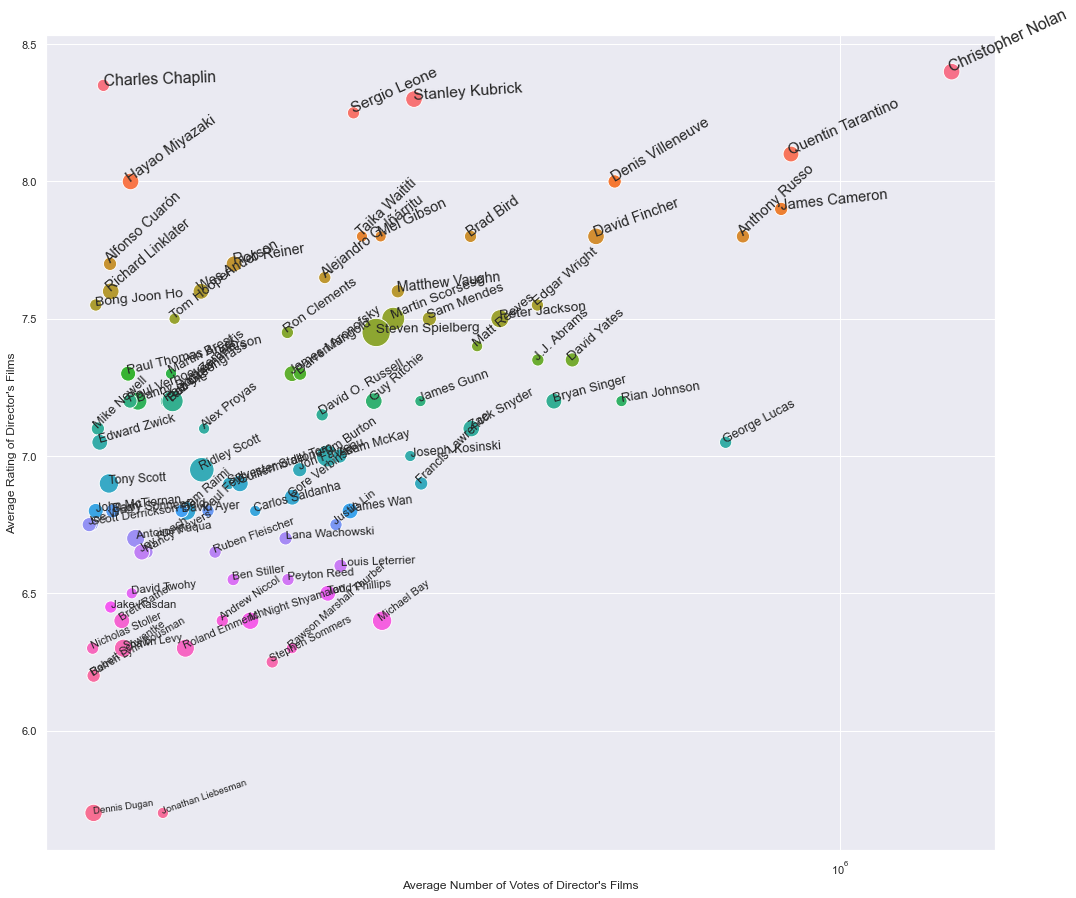

In [49]:
directors_successful = director_success[(director_success[("numVotes","median")]>150000)&\
                (director_success[("nconst","size")]>4)].sort_values(("averageRating","median"),ascending=False)
plt.figure(figsize=(17,15))
sns.scatterplot(y=directors_successful[("averageRating","median")],x=directors_successful[("numVotes","median")],
               s=directors_successful[("nconst","size")]*25,hue=directors_successful.index, legend=False,
               )
plt.xlabel("Average Number of Votes of Director's Films")
plt.ylabel("Average Rating of Director's Films")
plt.gca().set_xscale("log")
for names in directors_successful.T:
    plt.text(directors_successful.T[names][("numVotes","median")],
            directors_successful.T[names][("averageRating","median")],
             names,rotation=np.random.randint(0,45), rotation_mode="anchor",
             fontsize=directors_successful.T[names][("averageRating","median")]**1.3)

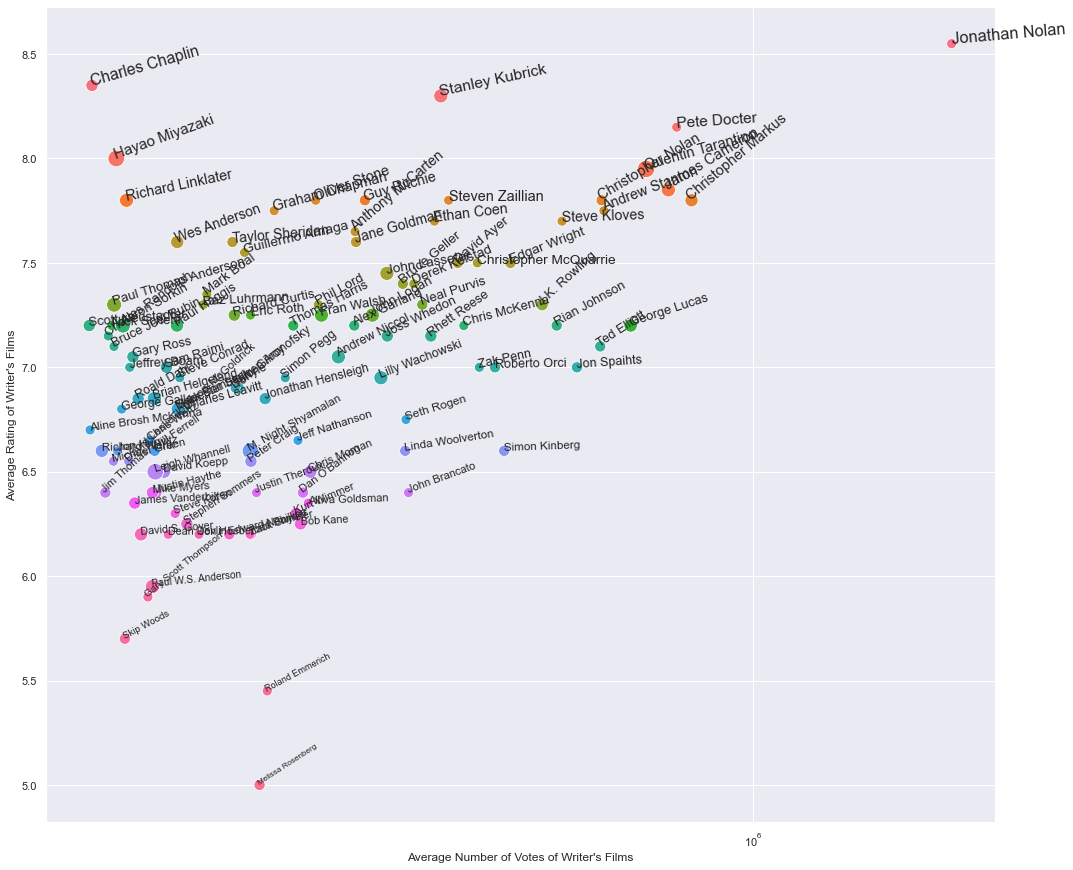

In [50]:
writer_temp = df_title_crew.drop("directors",axis=1)
writer_temp.columns = ["tconst","nconst"]
writer_temp.nconst = writer_temp.nconst.dropna().apply(lambda x: x.split(",")[0])
writers = pd.merge(pd.merge(pd.merge(df_title_basics,df_ratings,on="tconst"),
                          writer_temp,on="tconst"),
                 df_name_basics[["nconst","primaryName"]],on="nconst")
writer_success = writers[writers.numVotes>25000].groupby("primaryName").\
agg({"averageRating":[np.median],"numVotes":[np.median],"nconst":[np.size]}).\
sort_values(("averageRating","median"),ascending=False)
writers_successful = writer_success[(writer_success[("numVotes","median")]>150000)&\
                (writer_success[("nconst","size")]>=4)].sort_values(("averageRating","median"),ascending=False)
plt.figure(figsize=(17,15))
sns.scatterplot(y=writers_successful[("averageRating","median")],x=writers_successful[("numVotes","median")],
               s=writers_successful[("nconst","size")]*25,hue=writers_successful.index, legend=False,
               )
plt.xlabel("Average Number of Votes of Writer's Films")
plt.ylabel("Average Rating of Writer's Films")
plt.gca().set_xscale("log")
for names in writers_successful.T:
    plt.text(writers_successful.T[names][("numVotes","median")],
            writers_successful.T[names][("averageRating","median")],
             names,rotation=np.random.randint(0,45), rotation_mode="anchor",
             fontsize=writers_successful.T[names][("averageRating","median")]**1.3)
del writer_temp


# Title Principals Table

In [51]:
df_title_principals = pickle.load(open("title.principals.sav","rb"))
df_title_principals.head(10)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,NaN
3,tt0000002,1,nm0721526,director,NaN,NaN
4,tt0000002,2,nm1335271,composer,NaN,NaN
5,tt0000003,1,nm0721526,director,NaN,NaN
6,tt0000003,2,nm1770680,producer,producer,NaN
7,tt0000003,3,nm1335271,composer,NaN,NaN
8,tt0000003,4,nm5442200,editor,NaN,NaN
9,tt0000004,1,nm0721526,director,NaN,NaN


<AxesSubplot:ylabel='category'>

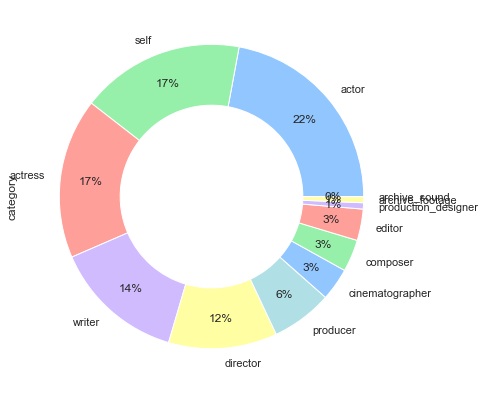

In [52]:
df_title_principals.category.value_counts().plot.pie(autopct="%.0f%%", pctdistance=0.8, figsize=(7,7),wedgeprops=dict(width=0.4))

In [53]:
df_title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52863515 entries, 0 to 52863514
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 2.4+ GB


In [54]:
inxs = df_title_principals.tconst.isin(df_title_basics.tconst)
use = df_title_principals[inxs]
top_names = use.nconst.value_counts().head(20)
top_names = pd.DataFrame(list(zip(top_names.index,top_names.values)),columns=["nconst","count"])
top_names = pd.merge(top_names,df_name_basics[["nconst","primaryName"]],on="nconst")
top_names["job_type"] = [use[use["nconst"] == i].category.value_counts().index[0] for i in top_names.nconst]
top_names

,nconst,count,primaryName,job_type
0,nm0000636,1080,William Shakespeare,writer
1,nm0006137,1007,Ilaiyaraaja,composer
2,nm0756966,948,Shôji Sakai,editor
3,nm0103977,785,Brahmanandam,actor
4,nm0648803,564,Matsunosuke Onoe,actor
5,nm0305182,548,Eddie Garcia,actor
6,nm0006982,540,Adoor Bhasi,actor
7,nm0232490,513,Dong-Chun Hyeon,editor
8,nm0453459,512,Hui-su Kim,editor
9,nm1930572,510,Kevin MacLeod,composer


# Title Akas Table

In [55]:
df_title_akas = pickle.load(open("title.akas.sav","rb"))
df_title_akas.columns = ['tconst', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'isOriginalTitle']
df_title_akas.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,NaN,imdbDisplay,NaN,0.0
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0.0
2,tt0000001,3,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0
3,tt0000001,4,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0.0
4,tt0000001,5,Карменсита,RU,NaN,imdbDisplay,NaN,0.0


In [56]:
df_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33715492 entries, 0 to 33715491
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   tconst           object 
 1   ordering         int64  
 2   title            object 
 3   region           object 
 4   language         object 
 5   types            object 
 6   attributes       object 
 7   isOriginalTitle  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ GB


In [57]:
df_title_akas = pd.merge(df_title_akas,df_title_basics,on="tconst")
df_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3053559 entries, 0 to 3053558
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   tconst           object 
 1   ordering         int64  
 2   title            object 
 3   region           object 
 4   language         object 
 5   types            object 
 6   attributes       object 
 7   isOriginalTitle  float64
 8   titleType        object 
 9   primaryTitle     object 
 10  originalTitle    object 
 11  startYear        float64
 12  runtimeMinutes   object 
 13  genres           object 
dtypes: float64(2), int64(1), object(11)
memory usage: 349.5+ MB


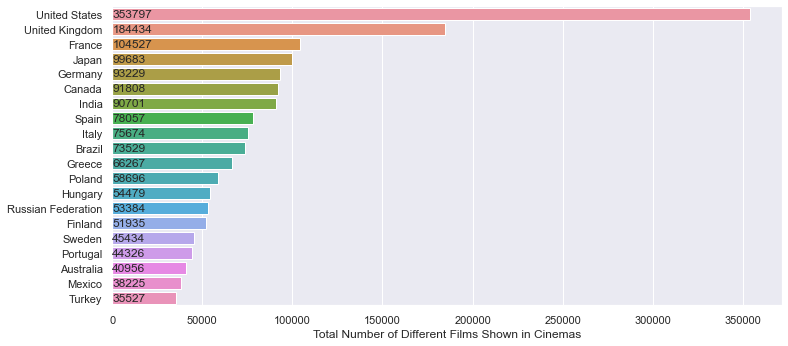

In [62]:
import pycountry
country_counts = df_title_akas.region.value_counts()
country_names = [pycountry.countries.get(alpha_2=coun).name for coun in country_counts.drop(["XWW","XWG"]).index[:20]]
counts = country_counts.drop(["XWW","XWG"]).values[:20]
plt.figure(figsize=(12,5.5))
sns.barplot(x=counts,y=country_names,orient="h")
plt.xlabel("Total Number of Different Films Shown in Cinemas")
for i,count in enumerate(counts):
    plt.text(100,i,count,va="center")